In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score,roc_curve


In [4]:
data = pd.read_csv(r"C:\Users\HP\Desktop\New folder\ML self learning projects\Wine quality pred\winequality-red.csv")

In [5]:
data

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
0         9.4        5  
1         9.8        5  
2         9.8        5  
3         9.8        6  
4         9.4        5  
...       ...      ...  
1594     10.5        5  
1595     11.2        6  
1596     11.0        6  
1597     10.2        5  
1598     11.0        6  

[1599 rows x 12 columns]

In [6]:
data.shape

(1599, 12)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [8]:
set(data.quality)

{3, 4, 5, 6, 7, 8}

# 3 is not that fine and 8 is prettty good

In [9]:
data.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

# check the missing Values

In [10]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [11]:
data[data.duplicated()]

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
4               7.4             0.700         0.00            1.90      0.076   
11              7.5             0.500         0.36            6.10      0.071   
27              7.9             0.430         0.21            1.60      0.106   
40              7.3             0.450         0.36            5.90      0.074   
65              7.2             0.725         0.05            4.65      0.086   
...             ...               ...          ...             ...        ...   
1563            7.2             0.695         0.13            2.00      0.076   
1564            7.2             0.695         0.13            2.00      0.076   
1567            7.2             0.695         0.13            2.00      0.076   
1581            6.2             0.560         0.09            1.70      0.053   
1596            6.3             0.510         0.13            2.30      0.076   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
4                    11.0                  34.0  0.99780  3.51       0.56   
11                   17.0                 102.0  0.99780  3.35       0.80   
27                   10.0                  37.0  0.99660  3.17       0.91   
40                   12.0                  87.0  0.99780  3.33       0.83   
65                    4.0                  11.0  0.99620  3.41       0.39   
...                   ...                   ...      ...   ...        ...   
1563                 12.0                  20.0  0.99546  3.29       0.54   
1564                 12.0                  20.0  0.99546  3.29       0.54   
1567                 12.0                  20.0  0.99546  3.29       0.54   
1581                 24.0                  32.0  0.99402  3.54       0.60   
1596                 29.0                  40.0  0.99574  3.42       0.75   

      alcohol  quality  
4         9.4        5  
11       10.5        5  
27        9.5        5  
40       10.5        5  
65       10.9        5  
...       ...      ...  
1563     10.1        5  
1564     10.1        5  
1567     10.1        5  
1581     11.3        5  
1596     11.0        6  

[240 rows x 12 columns]

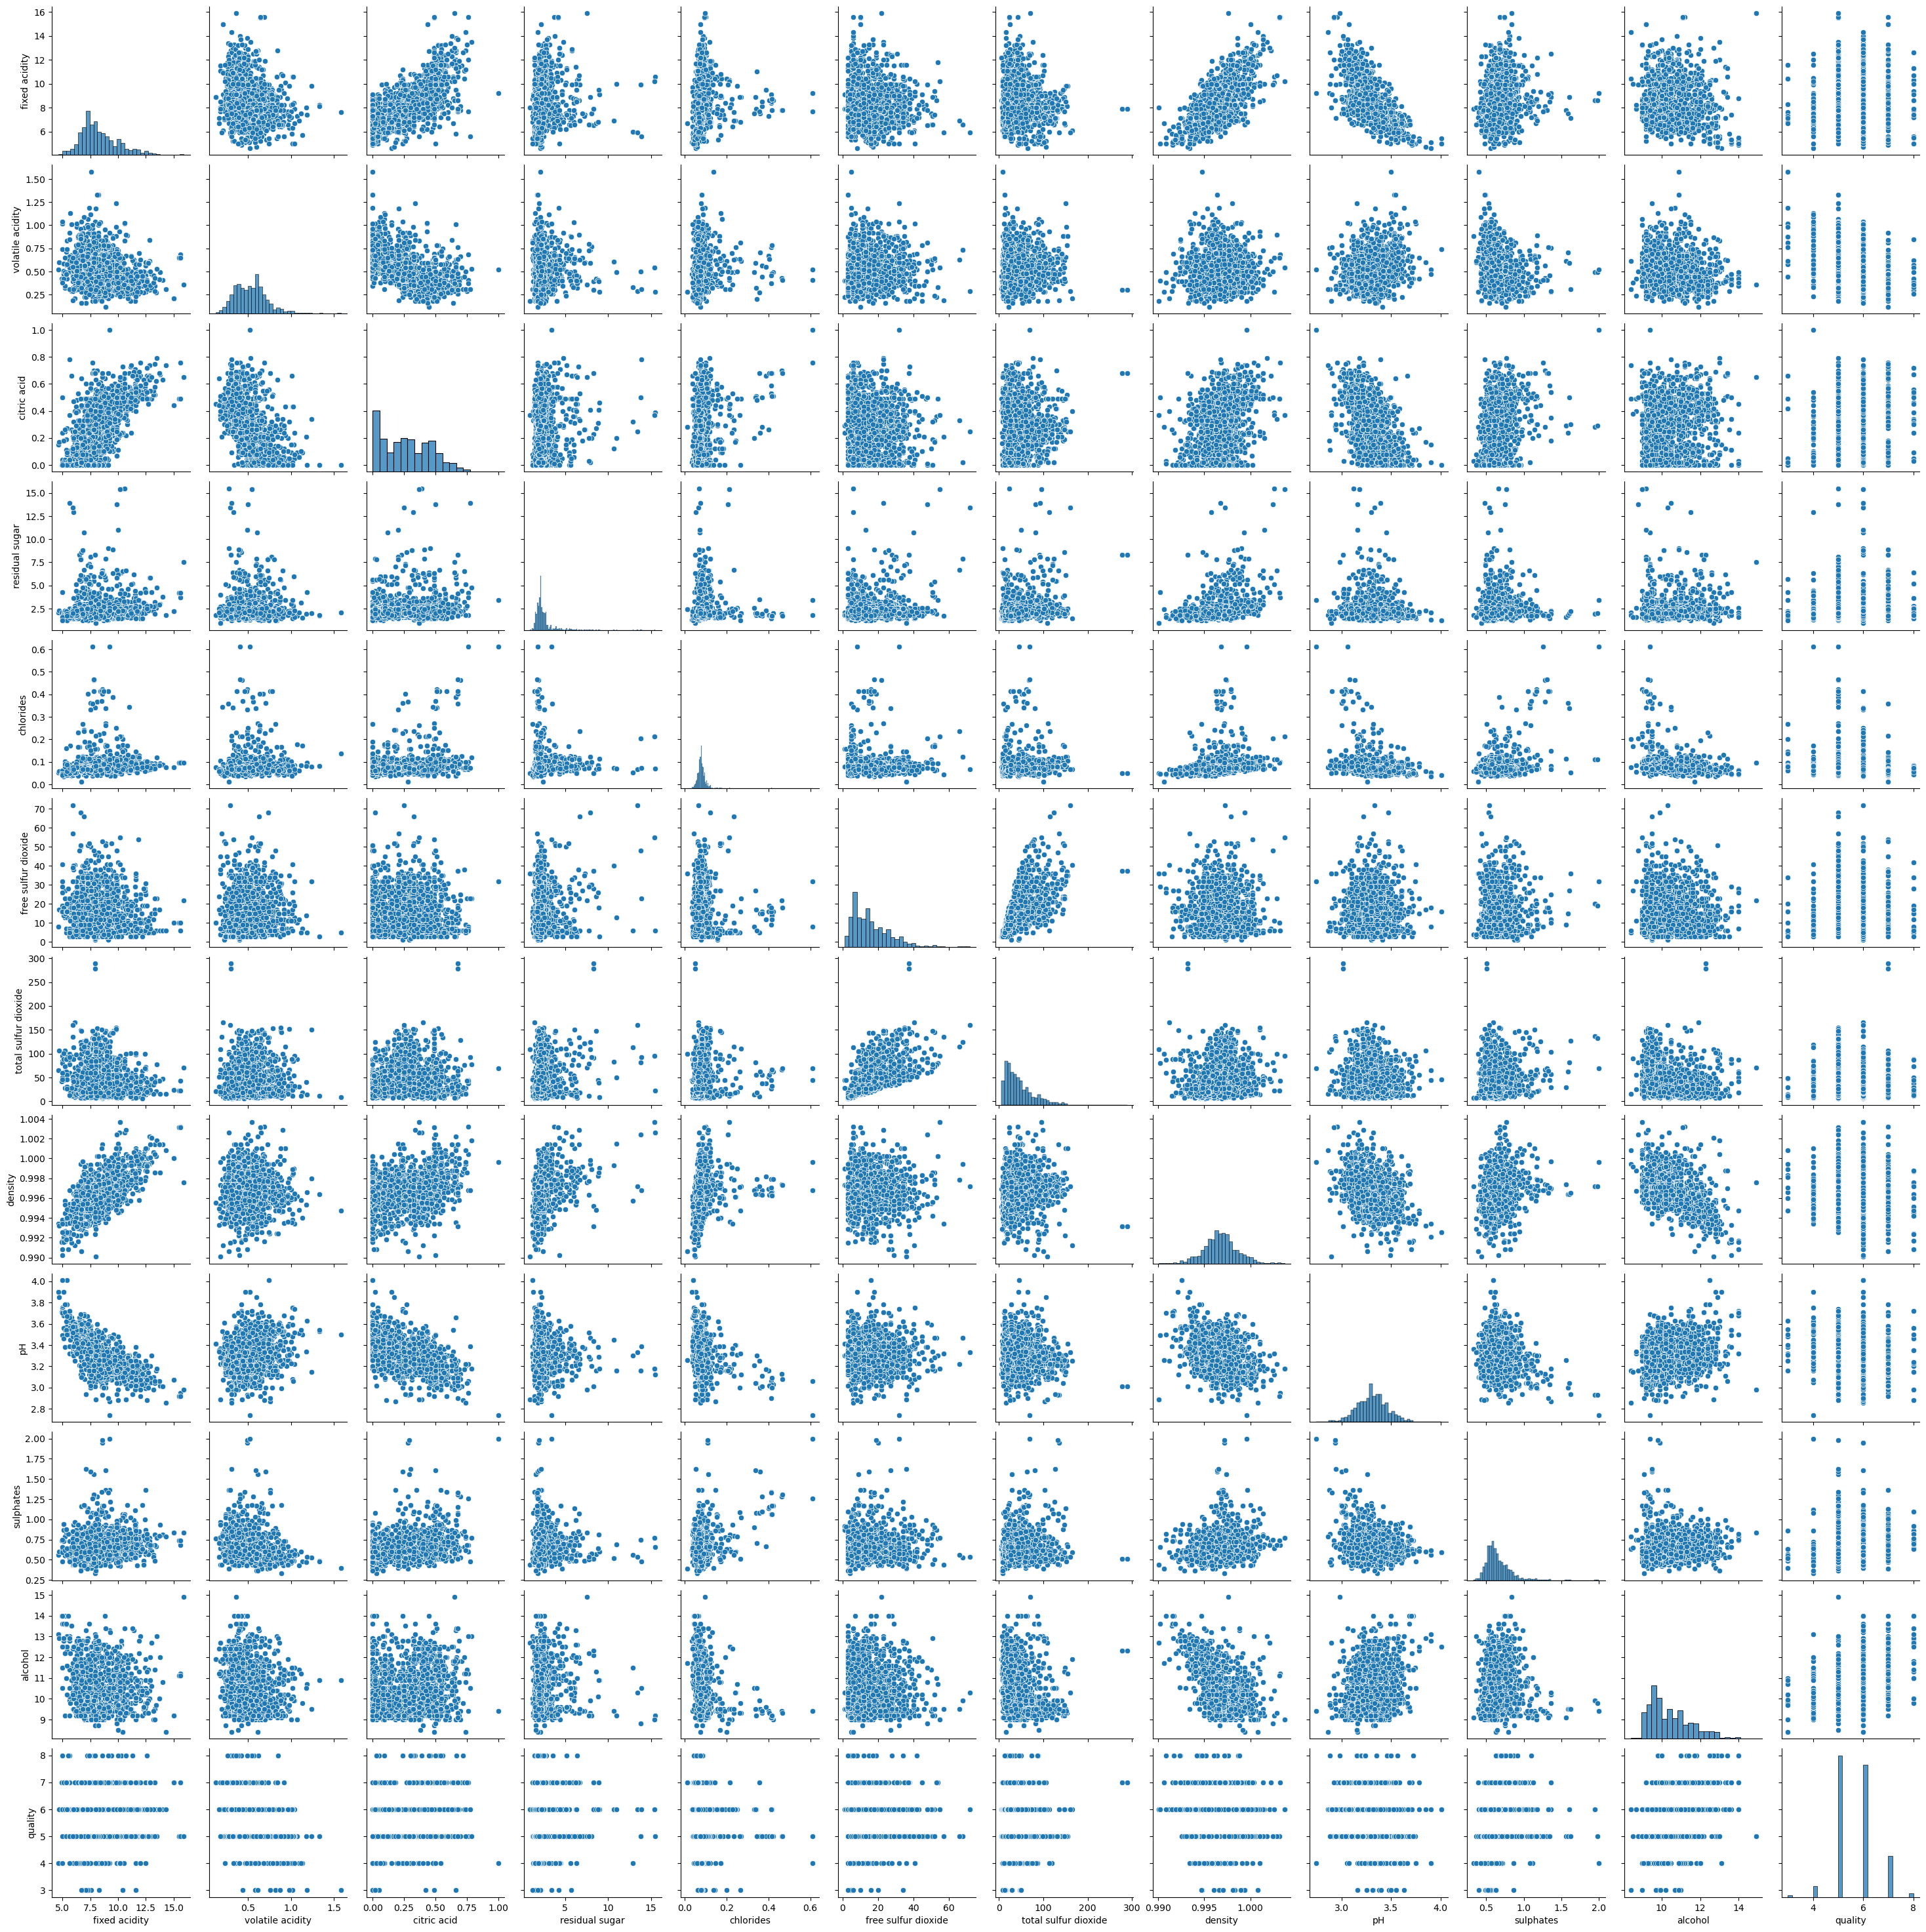

In [12]:
sns.pairplot(data)
plt.show()

<Axes: >

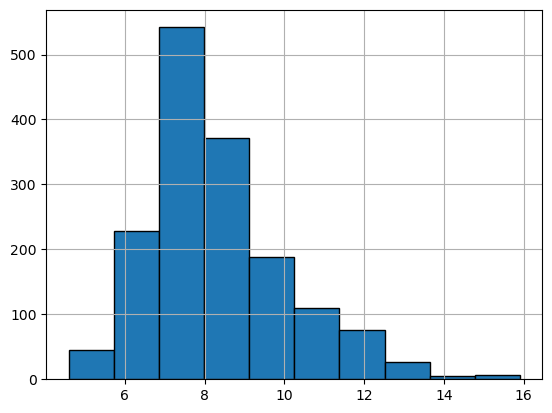

In [13]:
data['fixed acidity'].hist(bins=10, edgecolor='black')



<Axes: >

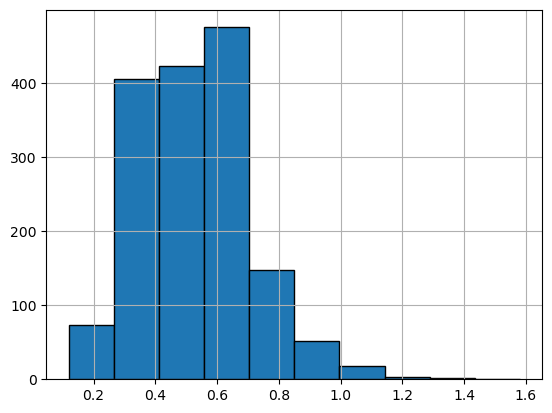

In [14]:
data['volatile acidity'].hist(bins=10, edgecolor='black')


<Axes: >

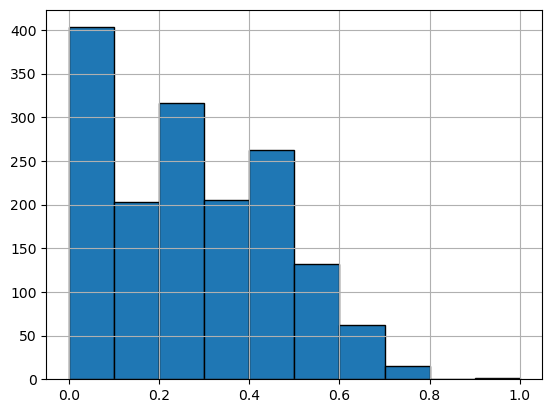

In [15]:
data['citric acid'].hist(bins=10, edgecolor='black')


<Axes: >

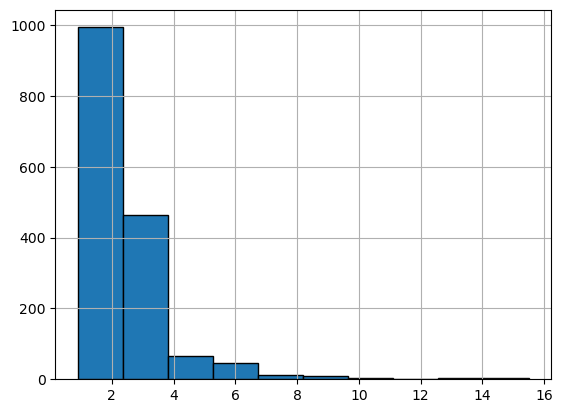

In [16]:

data['residual sugar'].hist(bins=10, edgecolor='black')


<Axes: >

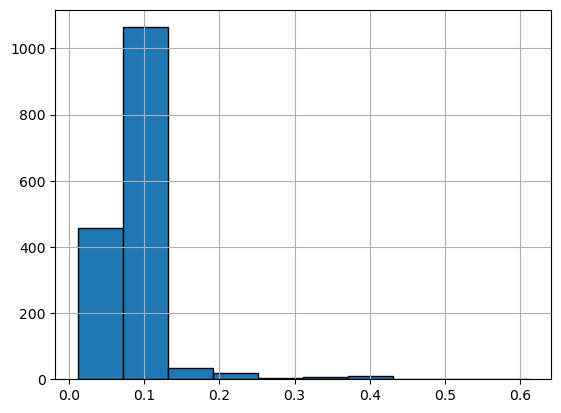

In [17]:
data['chlorides'].hist(bins=10, edgecolor='black')


<Axes: >

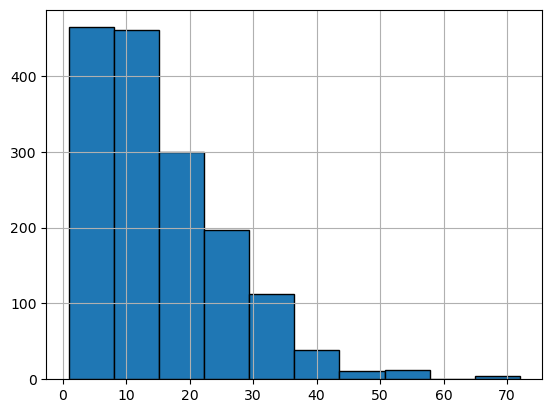

In [18]:
data['free sulfur dioxide'].hist(bins=10, edgecolor='black')


<Axes: >

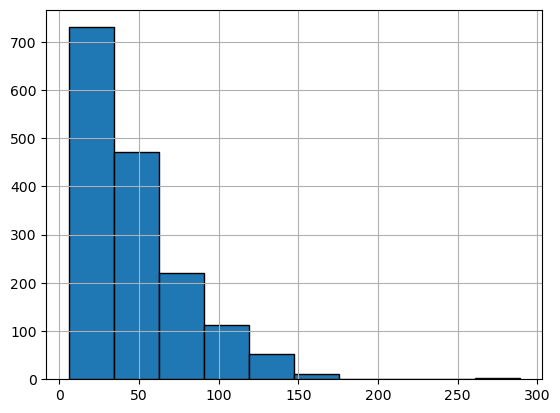

In [19]:
data['total sulfur dioxide'].hist(bins=10, edgecolor='black')


<Axes: >

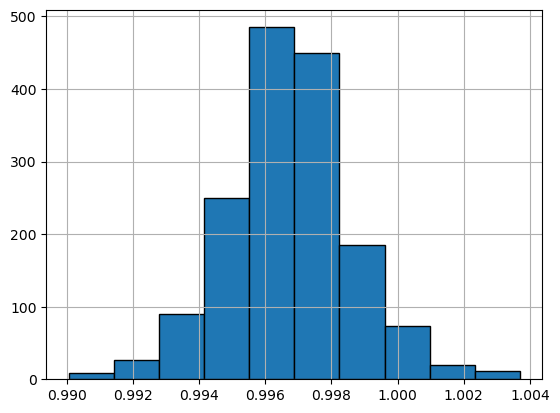

In [20]:
data['density'].hist(bins=10, edgecolor='black')


<Axes: >

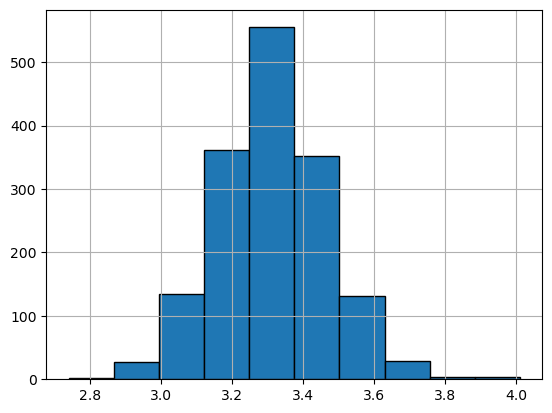

In [21]:
data['pH'].hist(bins=10, edgecolor='black')


<Axes: >

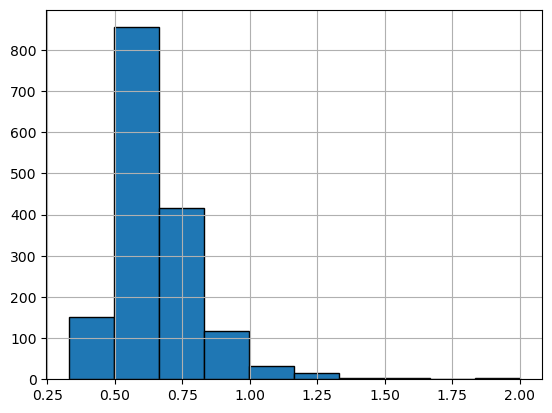

In [22]:
data['sulphates'].hist(bins=10, edgecolor='black')


<Axes: >

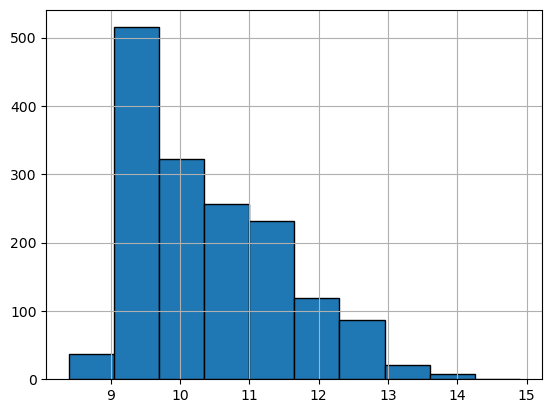

In [23]:
data['alcohol'].hist(bins=10, edgecolor='black')

# correaltion among all feature inside the datset

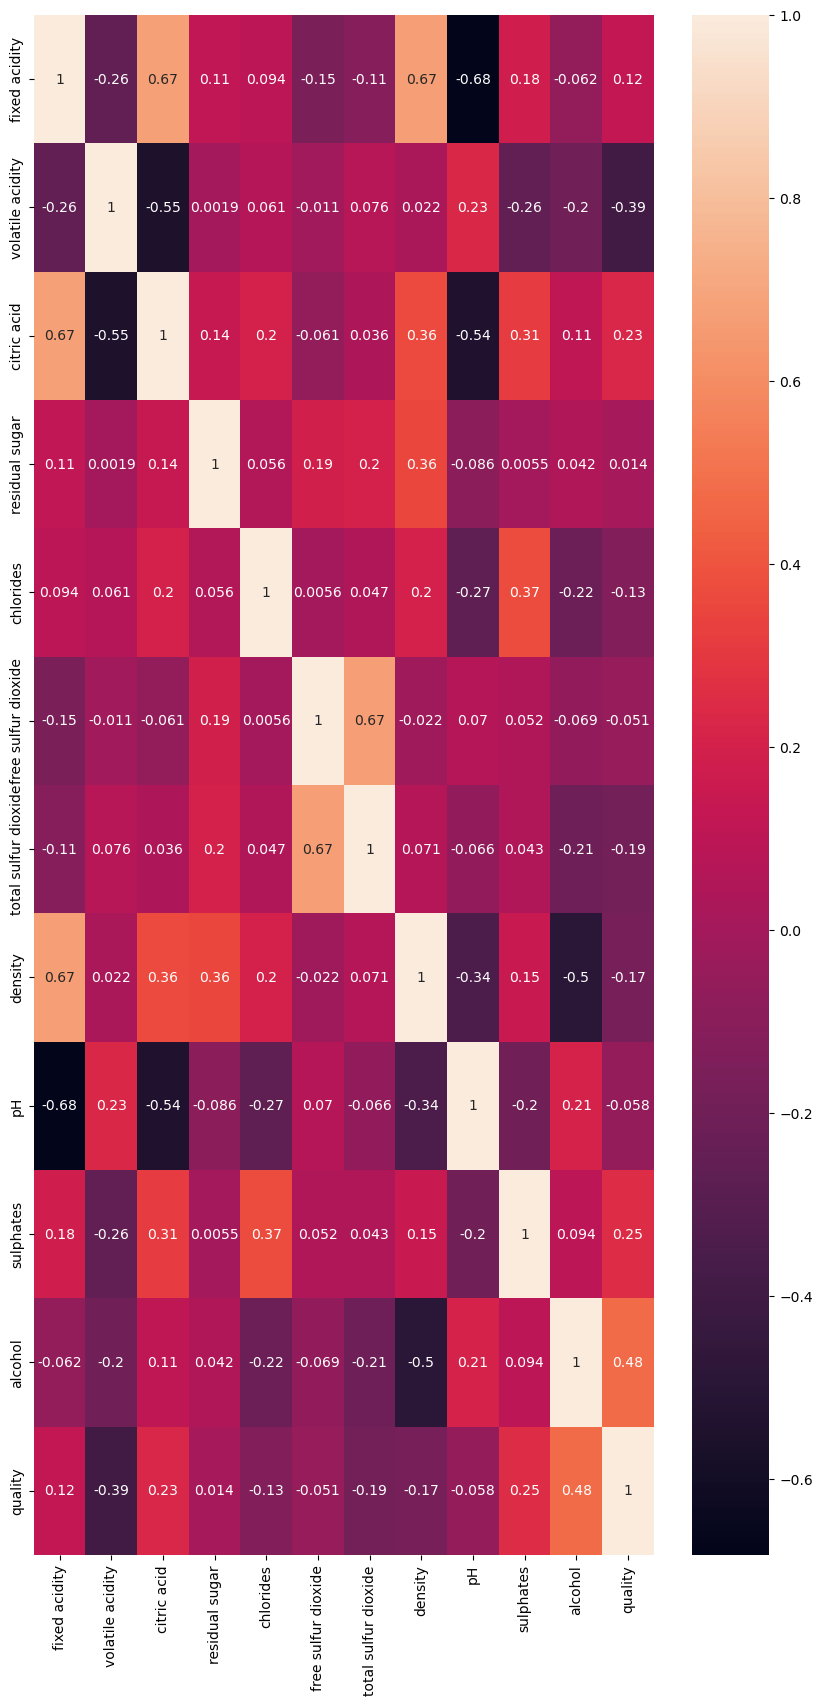

In [24]:
plt.figure(figsize=(10,20))
corr = data.corr()
sns.heatmap(corr, annot=True)
plt.show
plt.savefig('correlation.png')

### There is multi colinearty present

In [25]:
data.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [26]:
x = data.drop(columns='quality')

In [27]:
x

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  
0         9.4  
1         9.8  
2         9.8  
3         9.8  
4         9.4  
...       ...  
1594     10.5  
1595     11.2  
1596     11.0  
1597     10.2  
1598     11.0  

[1599 rows x 11 columns]

In [28]:
y = data['quality']

In [29]:
y

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

In [30]:
import sklearn
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import tree
%matplotlib inline

In [31]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=.25, random_state=30)

In [32]:
dt_model = DecisionTreeClassifier()


In [33]:
dt_model.fit(x_train, y_train)

DecisionTreeClassifier()

[Text(0.5454695000545494, 0.9722222222222222, 'x[10] <= 10.35\ngini = 0.642\nsamples = 1199\nvalue = [8, 35, 512, 477, 153, 14]'),
 Text(0.31796687486362646, 0.9166666666666666, 'x[6] <= 95.5\ngini = 0.528\nsamples = 666\nvalue = [6.0, 20.0, 406.0, 209.0, 23.0, 2.0]'),
 Text(0.19801099170848788, 0.8611111111111112, 'x[9] <= 0.585\ngini = 0.554\nsamples = 584\nvalue = [6.0, 19.0, 332.0, 202.0, 23.0, 2.0]'),
 Text(0.07332124154483963, 0.8055555555555556, 'x[6] <= 90.5\ngini = 0.468\nsamples = 261\nvalue = [3, 14, 179, 63, 2, 0]'),
 Text(0.05120826969234126, 0.75, 'x[10] <= 9.075\ngini = 0.453\nsamples = 250\nvalue = [3, 14, 176, 55, 2, 0]'),
 Text(0.017455814968361336, 0.6944444444444444, 'x[6] <= 39.0\ngini = 0.604\nsamples = 15\nvalue = [0, 2, 6, 7, 0, 0]'),
 Text(0.010473488981016802, 0.6388888888888888, 'x[9] <= 0.54\ngini = 0.406\nsamples = 8\nvalue = [0, 1, 1, 6, 0, 0]'),
 Text(0.006982325987344534, 0.5833333333333334, 'x[0] <= 6.95\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1, 0, 0,

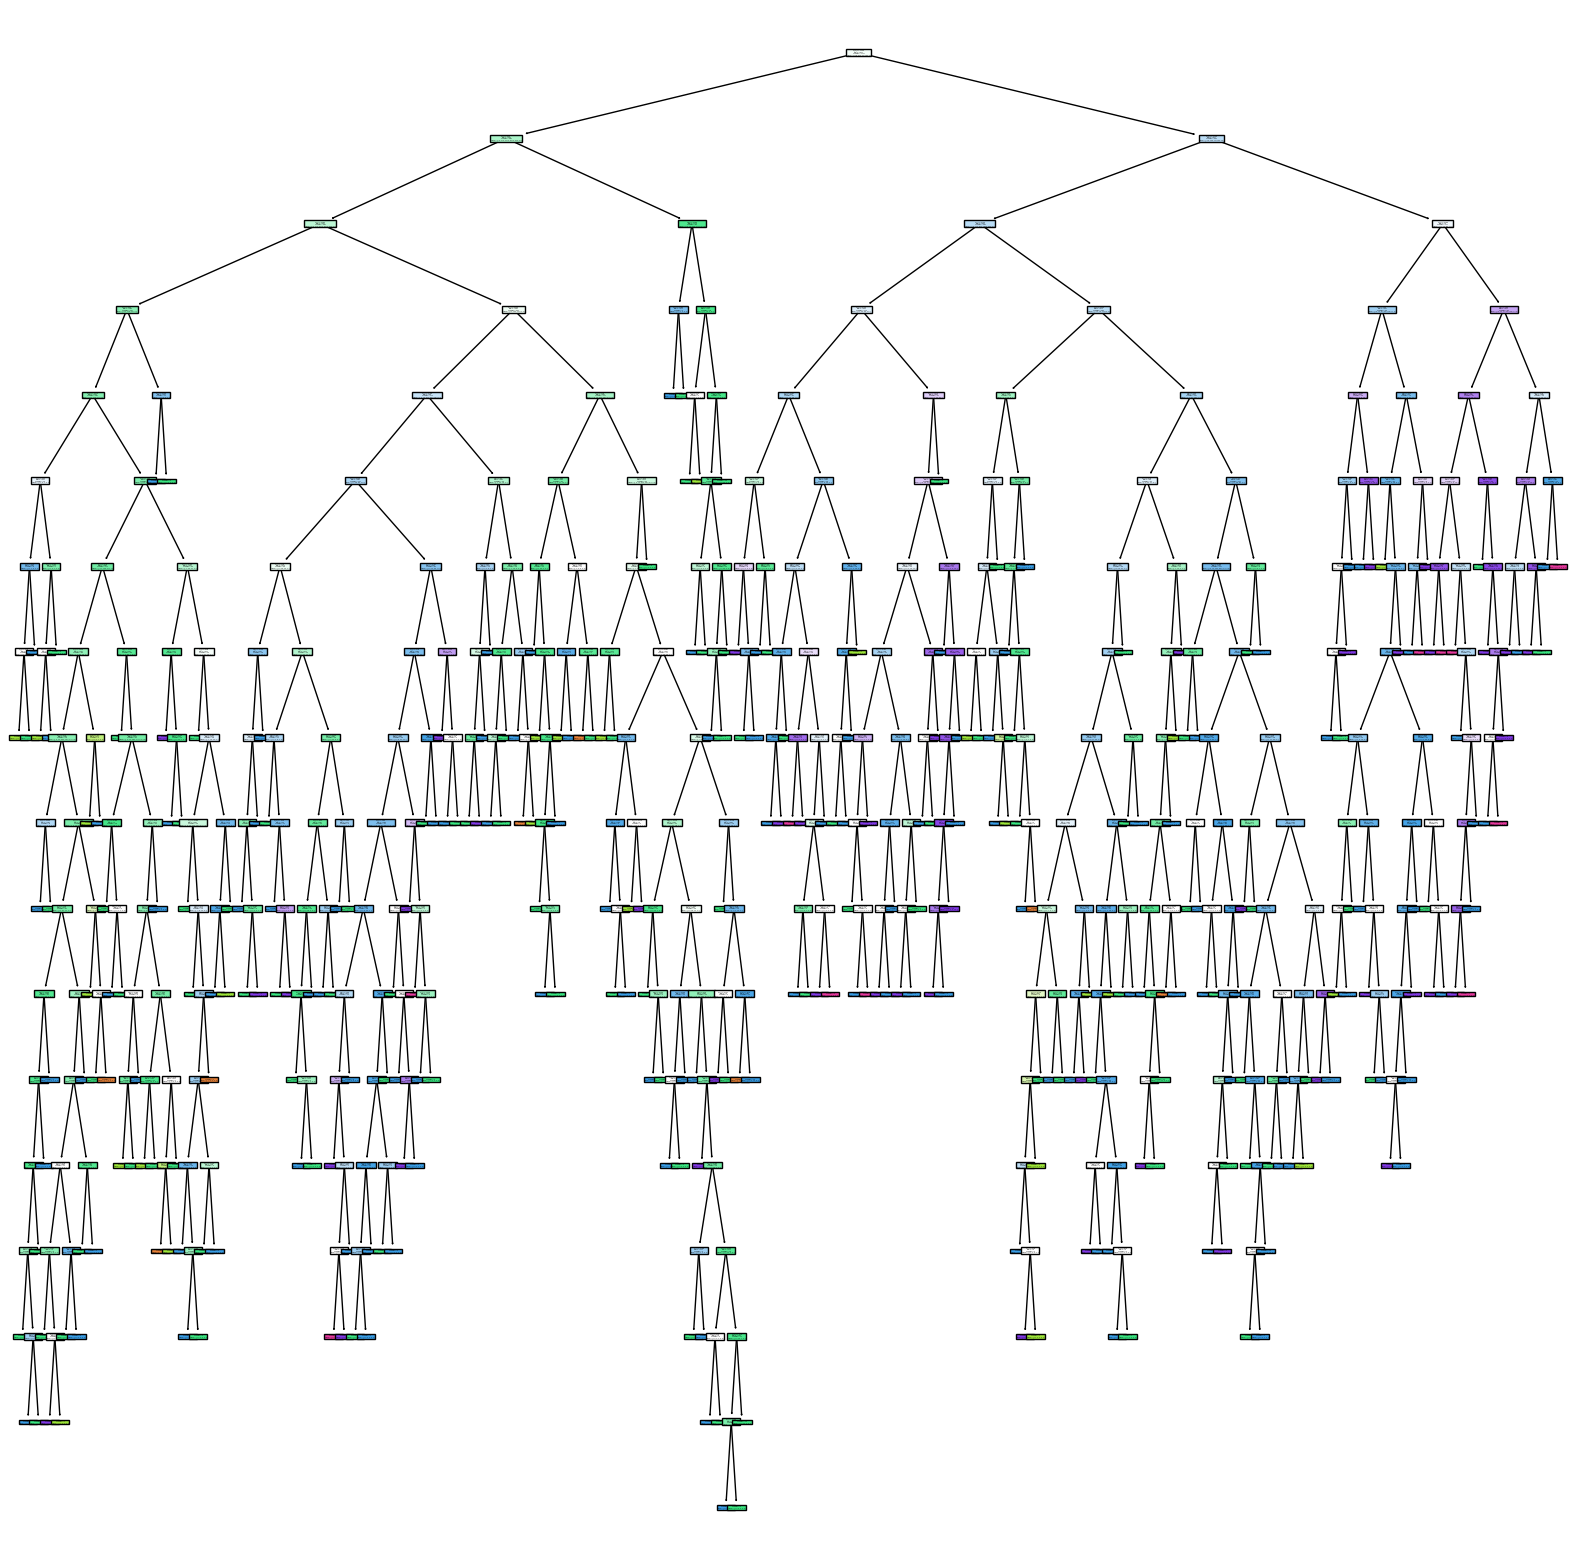

In [34]:
plt.figure(figsize=(20,20))
tree.plot_tree(dt_model,filled=True)

In [35]:
df1 = data.head(500)
x1 = df1.drop(columns='quality')
y1 = df1.quality

In [36]:
dt_model1 = DecisionTreeClassifier()
dt_model1.fit(x1,y1)

DecisionTreeClassifier()

[Text(0.4598099226804124, 0.9722222222222222, 'x[10] <= 9.85\ngini = 0.624\nsamples = 500\nvalue = [1, 16, 239, 184, 52, 8]'),
 Text(0.29088566073102157, 0.9166666666666666, 'x[6] <= 62.5\ngini = 0.504\nsamples = 259\nvalue = [1, 12, 167, 72, 6, 1]'),
 Text(0.1825210871602624, 0.8611111111111112, 'x[2] <= 0.415\ngini = 0.576\nsamples = 169\nvalue = [1, 9, 91, 61, 6, 1]'),
 Text(0.08388003748828492, 0.8055555555555556, 'x[10] <= 9.05\ngini = 0.525\nsamples = 131\nvalue = [0, 8, 81, 39, 3, 0]'),
 Text(0.02999062792877226, 0.75, 'x[9] <= 0.54\ngini = 0.403\nsamples = 12\nvalue = [0, 2, 1, 9, 0, 0]'),
 Text(0.022492970946579195, 0.6944444444444444, 'x[1] <= 0.605\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1, 0, 0, 0]'),
 Text(0.01499531396438613, 0.6388888888888888, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0, 0, 0, 0]'),
 Text(0.02999062792877226, 0.6388888888888888, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1, 0, 0, 0]'),
 Text(0.03748828491096532, 0.6944444444444444, 'gini = 0.0\nsamples 

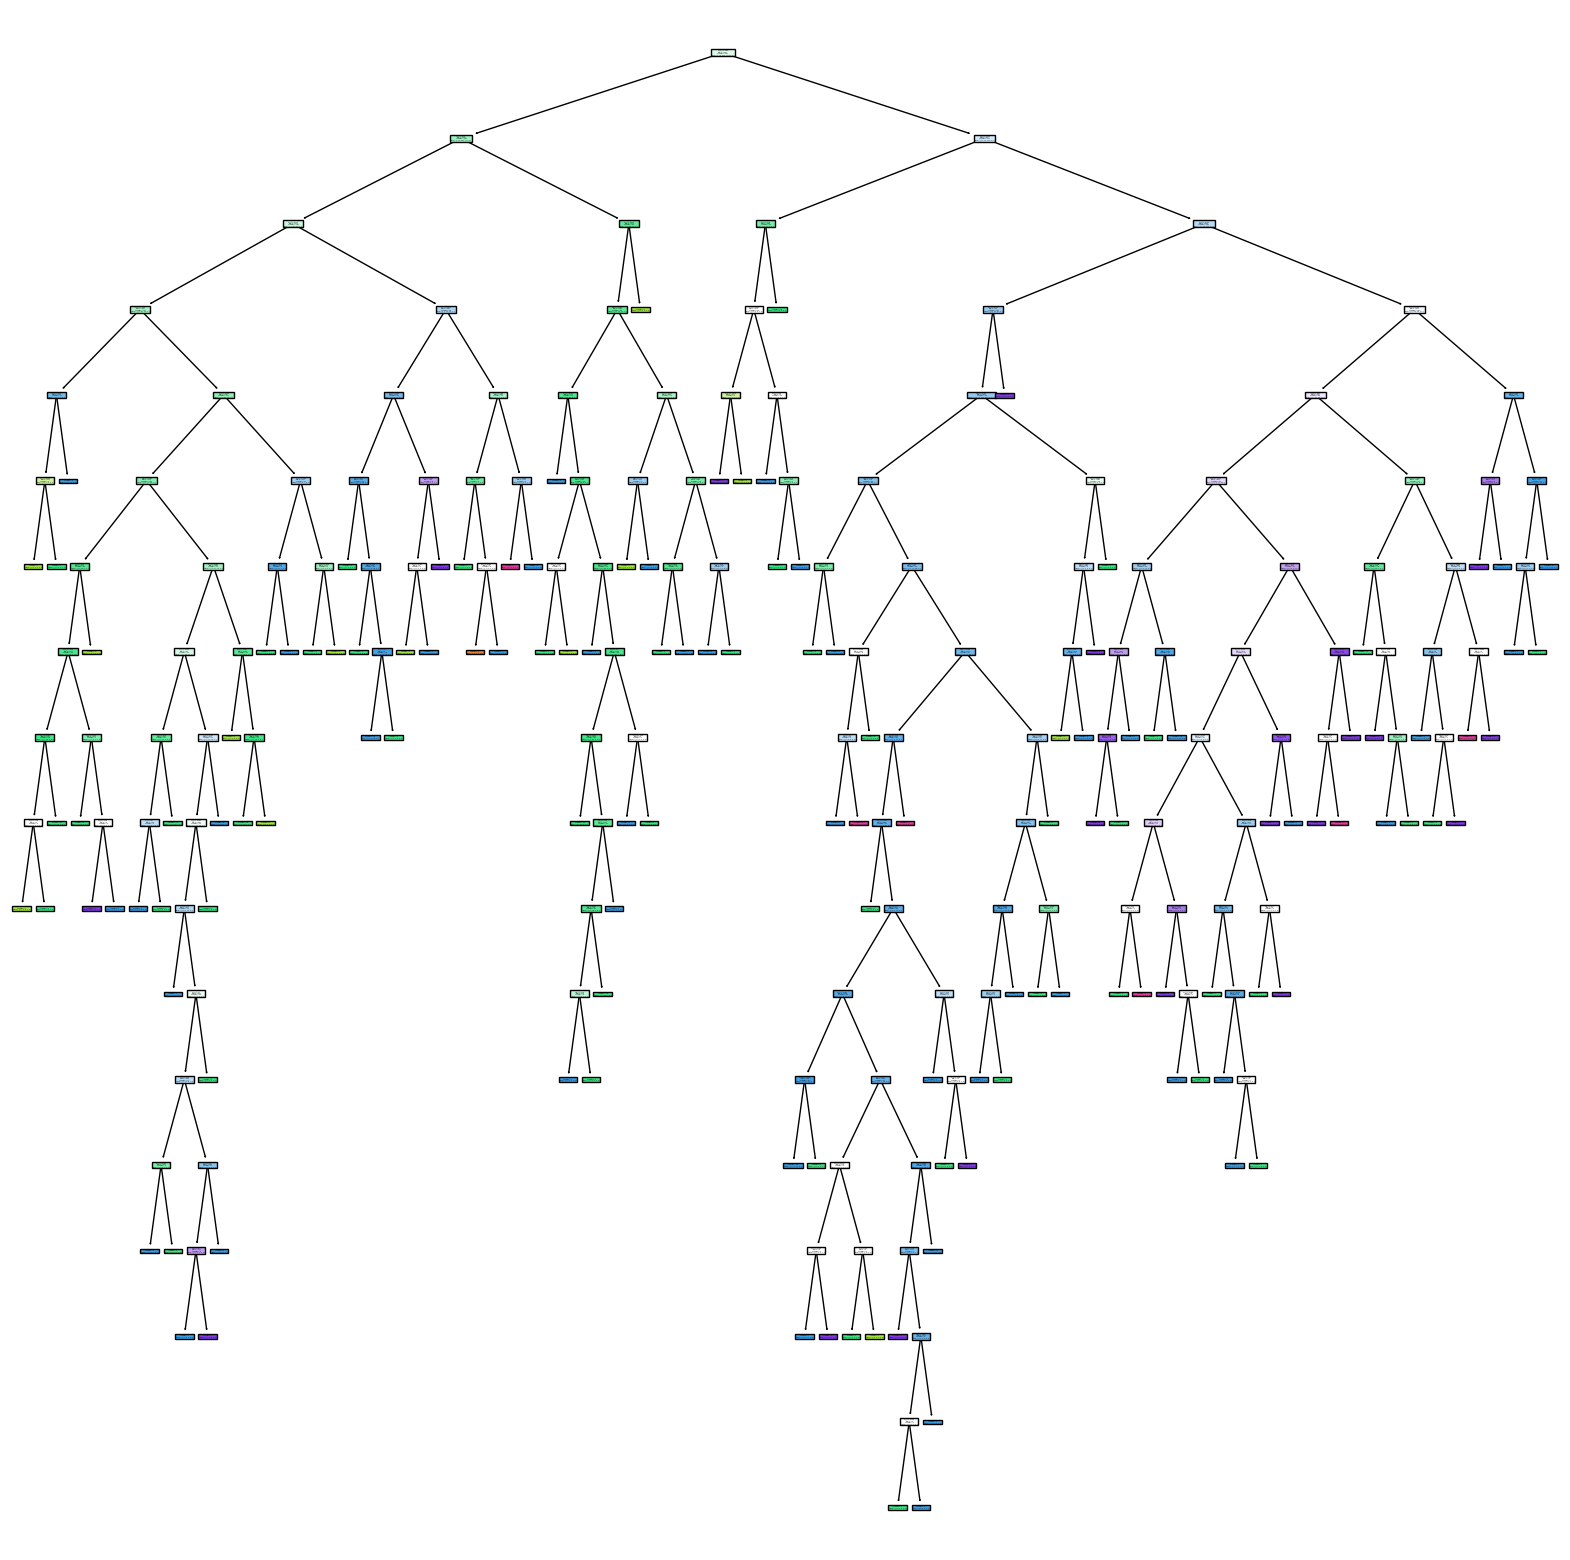

In [37]:
plt.figure(figsize=(20,20))
tree.plot_tree(dt_model1,filled=True)

In [38]:
dt_model1.predict(x1)

array([5, 5, 5, 6, 5, 5, 5, 7, 7, 5, 5, 5, 5, 5, 5, 5, 7, 5, 4, 6, 6, 5,
       5, 5, 6, 5, 5, 5, 5, 6, 5, 6, 5, 6, 5, 6, 6, 7, 4, 5, 5, 4, 6, 5,
       5, 4, 5, 5, 5, 5, 5, 6, 6, 5, 6, 5, 5, 5, 5, 6, 5, 5, 7, 5, 5, 5,
       5, 5, 5, 6, 6, 5, 5, 4, 5, 5, 5, 6, 5, 4, 5, 5, 5, 5, 6, 5, 6, 5,
       5, 5, 5, 6, 5, 5, 4, 6, 5, 5, 5, 6, 6, 6, 6, 5, 5, 5, 5, 5, 6, 5,
       5, 5, 5, 6, 5, 6, 6, 6, 6, 6, 5, 6, 5, 5, 5, 5, 5, 5, 7, 5, 5, 5,
       5, 6, 6, 5, 5, 5, 5, 5, 5, 5, 6, 5, 6, 5, 5, 5, 6, 6, 6, 4, 5, 5,
       5, 5, 5, 5, 5, 6, 5, 4, 6, 5, 5, 5, 5, 4, 6, 5, 4, 6, 6, 6, 5, 5,
       5, 6, 5, 5, 5, 5, 5, 5, 6, 5, 5, 5, 5, 5, 5, 6, 5, 5, 5, 5, 5, 6,
       7, 4, 7, 5, 5, 5, 6, 7, 7, 5, 5, 7, 6, 6, 6, 5, 6, 5, 5, 5, 5, 5,
       6, 5, 5, 6, 4, 6, 6, 5, 6, 5, 7, 6, 6, 5, 6, 6, 6, 6, 6, 6, 5, 6,
       6, 7, 7, 6, 5, 5, 6, 6, 6, 6, 5, 5, 6, 5, 5, 5, 5, 7, 5, 4, 5, 5,
       5, 7, 4, 8, 6, 6, 6, 6, 5, 5, 5, 6, 6, 6, 8, 7, 6, 7, 5, 7, 5, 5,
       6, 6, 7, 5, 7, 5, 6, 6, 6, 5, 5, 5, 5, 5, 6,

In [39]:
dt_model1.score(x1,y1)

1.0

In [40]:
dt_model1.score(x_test,y_test)

0.5975

### As you can see the training accuracy is 100 and testing is 48% so we can conclude that it's a overfitted model

### so now our goal is to make train and test score as close as possible

### lets try to make a descision tree using entropy and check what's the accuracy

In [41]:
dt_en = DecisionTreeClassifier(criterion='entropy')

In [42]:
dt_en.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [43]:
dt_en.score(x_test,y_test)

0.6075

In [44]:
path = dt_model.cost_complexity_pruning_path(x1,y1)
ccp_alpha = path['ccp_alphas']

In [45]:
ccp_alpha

array([0.        , 0.00166667, 0.00175   , 0.00181818, 0.00184615,
       0.00186667, 0.00188235, 0.00192308, 0.002     , 0.002     ,
       0.002     , 0.002     , 0.002     , 0.002     , 0.002     ,
       0.002     , 0.002     , 0.002     , 0.00203333, 0.00247552,
       0.00261111, 0.00262769, 0.00266667, 0.00266667, 0.00266667,
       0.00266667, 0.00266667, 0.00266667, 0.00266667, 0.00266667,
       0.00272222, 0.003     , 0.003     , 0.003     , 0.003     ,
       0.00304762, 0.00305051, 0.00308418, 0.00325   , 0.00328205,
       0.00333333, 0.00333333, 0.00334032, 0.00336606, 0.00342857,
       0.00343316, 0.0035    , 0.0035    , 0.0036    , 0.00363636,
       0.00373809, 0.0038    , 0.0038237 , 0.004     , 0.00404444,
       0.00428571, 0.00437662, 0.00462338, 0.00465709, 0.00466667,
       0.0048    , 0.00495726, 0.00504242, 0.00508235, 0.00509091,
       0.00510606, 0.00516667, 0.00568485, 0.00589394, 0.00656364,
       0.00671079, 0.0067591 , 0.00688352, 0.00688889, 0.007  

In [46]:
dt_model2 = []
for ccp in ccp_alpha:
    dt_m = DecisionTreeClassifier(ccp_alpha = ccp)  
    dt_m.fit(x1,y1)
    dt_model2.append(dt_m)

In [47]:
dt_model2

[DecisionTreeClassifier(),
 DecisionTreeClassifier(ccp_alpha=0.0016666666666666668),
 DecisionTreeClassifier(ccp_alpha=0.00175),
 DecisionTreeClassifier(ccp_alpha=0.0018181818181818184),
 DecisionTreeClassifier(ccp_alpha=0.0018461538461538455),
 DecisionTreeClassifier(ccp_alpha=0.001866666666666667),
 DecisionTreeClassifier(ccp_alpha=0.001882352941176471),
 DecisionTreeClassifier(ccp_alpha=0.0019230769230769243),
 DecisionTreeClassifier(ccp_alpha=0.002),
 DecisionTreeClassifier(ccp_alpha=0.002),
 DecisionTreeClassifier(ccp_alpha=0.002),
 DecisionTreeClassifier(ccp_alpha=0.002),
 DecisionTreeClassifier(ccp_alpha=0.002),
 DecisionTreeClassifier(ccp_alpha=0.002),
 DecisionTreeClassifier(ccp_alpha=0.002),
 DecisionTreeClassifier(ccp_alpha=0.002),
 DecisionTreeClassifier(ccp_alpha=0.002),
 DecisionTreeClassifier(ccp_alpha=0.002),
 DecisionTreeClassifier(ccp_alpha=0.002033333333333334),
 DecisionTreeClassifier(ccp_alpha=0.0024755244755244737),
 DecisionTreeClassifier(ccp_alpha=0.002611111111

#### we are bulding multiple model using diferent CCP_ALPHA 
#### CCP_Alpha is pruning. Means if cost of branchs is more than 0.031 than we will not create those branches
### we will try to chose that CCP_alpha which have train and test acurracy close o each other

In [48]:
train_score = [i.score(x1,y1) for i in dt_model2]

In [49]:
test_score = [i.score(x_test,y_test) for i in dt_model2]

In [50]:
train_score

[1.0,
 0.998,
 0.998,
 0.994,
 0.992,
 0.99,
 0.988,
 0.984,
 0.96,
 0.96,
 0.962,
 0.964,
 0.96,
 0.964,
 0.962,
 0.96,
 0.96,
 0.96,
 0.962,
 0.958,
 0.952,
 0.946,
 0.928,
 0.928,
 0.932,
 0.932,
 0.932,
 0.928,
 0.934,
 0.932,
 0.928,
 0.918,
 0.916,
 0.912,
 0.918,
 0.916,
 0.912,
 0.91,
 0.908,
 0.904,
 0.902,
 0.898,
 0.894,
 0.896,
 0.89,
 0.89,
 0.886,
 0.882,
 0.878,
 0.876,
 0.87,
 0.868,
 0.864,
 0.854,
 0.854,
 0.856,
 0.852,
 0.848,
 0.834,
 0.818,
 0.814,
 0.81,
 0.804,
 0.802,
 0.794,
 0.79,
 0.786,
 0.784,
 0.78,
 0.776,
 0.776,
 0.772,
 0.768,
 0.762,
 0.758,
 0.742,
 0.728,
 0.718,
 0.698,
 0.69,
 0.682,
 0.676,
 0.676,
 0.636,
 0.596,
 0.596,
 0.596,
 0.558,
 0.478]

In [51]:
test_score

[0.61,
 0.6,
 0.605,
 0.595,
 0.6225,
 0.605,
 0.5775,
 0.585,
 0.57,
 0.57,
 0.5775,
 0.615,
 0.6025,
 0.6075,
 0.59,
 0.575,
 0.5925,
 0.6025,
 0.5725,
 0.58,
 0.6025,
 0.6,
 0.59,
 0.58,
 0.6025,
 0.5925,
 0.5875,
 0.605,
 0.6125,
 0.5875,
 0.5875,
 0.5925,
 0.595,
 0.595,
 0.58,
 0.6,
 0.6075,
 0.585,
 0.59,
 0.605,
 0.595,
 0.615,
 0.6125,
 0.61,
 0.6,
 0.6025,
 0.5825,
 0.5875,
 0.6025,
 0.61,
 0.6075,
 0.62,
 0.61,
 0.605,
 0.6125,
 0.6125,
 0.605,
 0.61,
 0.61,
 0.605,
 0.605,
 0.6125,
 0.615,
 0.615,
 0.61,
 0.6075,
 0.6075,
 0.5975,
 0.5925,
 0.5875,
 0.5875,
 0.5825,
 0.5825,
 0.5925,
 0.59,
 0.585,
 0.5825,
 0.5825,
 0.56,
 0.5725,
 0.5625,
 0.555,
 0.555,
 0.54,
 0.5775,
 0.5775,
 0.5775,
 0.545,
 0.4225]

In [52]:
path

{'ccp_alphas': array([0.        , 0.00166667, 0.00175   , 0.00181818, 0.00184615,
        0.00186667, 0.00188235, 0.00192308, 0.002     , 0.002     ,
        0.002     , 0.002     , 0.002     , 0.002     , 0.002     ,
        0.002     , 0.002     , 0.002     , 0.00203333, 0.00247552,
        0.00261111, 0.00262769, 0.00266667, 0.00266667, 0.00266667,
        0.00266667, 0.00266667, 0.00266667, 0.00266667, 0.00266667,
        0.00272222, 0.003     , 0.003     , 0.003     , 0.003     ,
        0.00304762, 0.00305051, 0.00308418, 0.00325   , 0.00328205,
        0.00333333, 0.00333333, 0.00334032, 0.00336606, 0.00342857,
        0.00343316, 0.0035    , 0.0035    , 0.0036    , 0.00363636,
        0.00373809, 0.0038    , 0.0038237 , 0.004     , 0.00404444,
        0.00428571, 0.00437662, 0.00462338, 0.00465709, 0.00466667,
        0.0048    , 0.00495726, 0.00504242, 0.00508235, 0.00509091,
        0.00510606, 0.00516667, 0.00568485, 0.00589394, 0.00656364,
        0.00671079, 0.0067591 , 0.

### now we will plot our train and test score

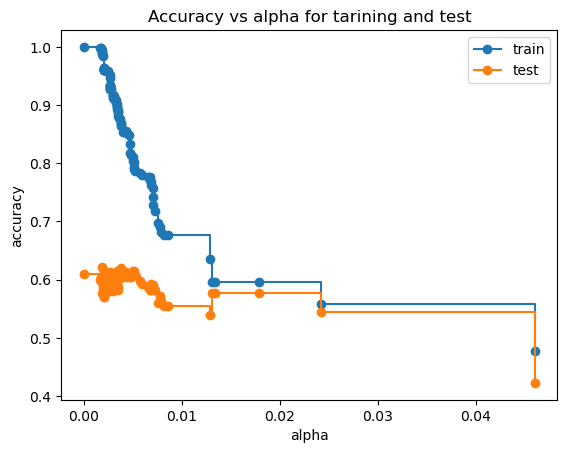

In [53]:
fig, ax = plt.subplots()
ax.set_xlabel('alpha')
ax.set_ylabel('accuracy')
ax.set_title('Accuracy')
ax.set_title('Accuracy vs alpha for tarining and test')
ax.plot(ccp_alpha, train_score, marker='o', label='train',
        drawstyle = 'steps-post')
ax.plot(ccp_alpha, test_score, marker='o', label='test',
        drawstyle = 'steps-post')
ax.legend()
plt.show()

### we can consider our CCP_alpha between 0.01 to 0.03, This simply means when our ccp_alpha is between 0.01 to 0.03 our train and test accuracy is closer to eachother

In [54]:
dt_model_ccp= DecisionTreeClassifier(random_state = 0, ccp_alpha = 0.014)
dt_model_ccp.fit(x1,y1)

DecisionTreeClassifier(ccp_alpha=0.014, random_state=0)

### comparing prevoius decision tree graph and this decision tree graph

[Text(0.5, 0.8333333333333334, 'x[10] <= 9.85\ngini = 0.624\nsamples = 500\nvalue = [1, 16, 239, 184, 52, 8]'),
 Text(0.25, 0.5, 'x[6] <= 62.5\ngini = 0.504\nsamples = 259\nvalue = [1, 12, 167, 72, 6, 1]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.576\nsamples = 169\nvalue = [1, 9, 91, 61, 6, 1]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.271\nsamples = 90\nvalue = [0, 3, 76, 11, 0, 0]'),
 Text(0.75, 0.5, 'x[9] <= 0.545\ngini = 0.657\nsamples = 241\nvalue = [0, 4, 72, 112, 46, 7]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.408\nsamples = 32\nvalue = [0, 2, 24, 5, 1, 0]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.638\nsamples = 209\nvalue = [0, 2, 48, 107, 45, 7]')]

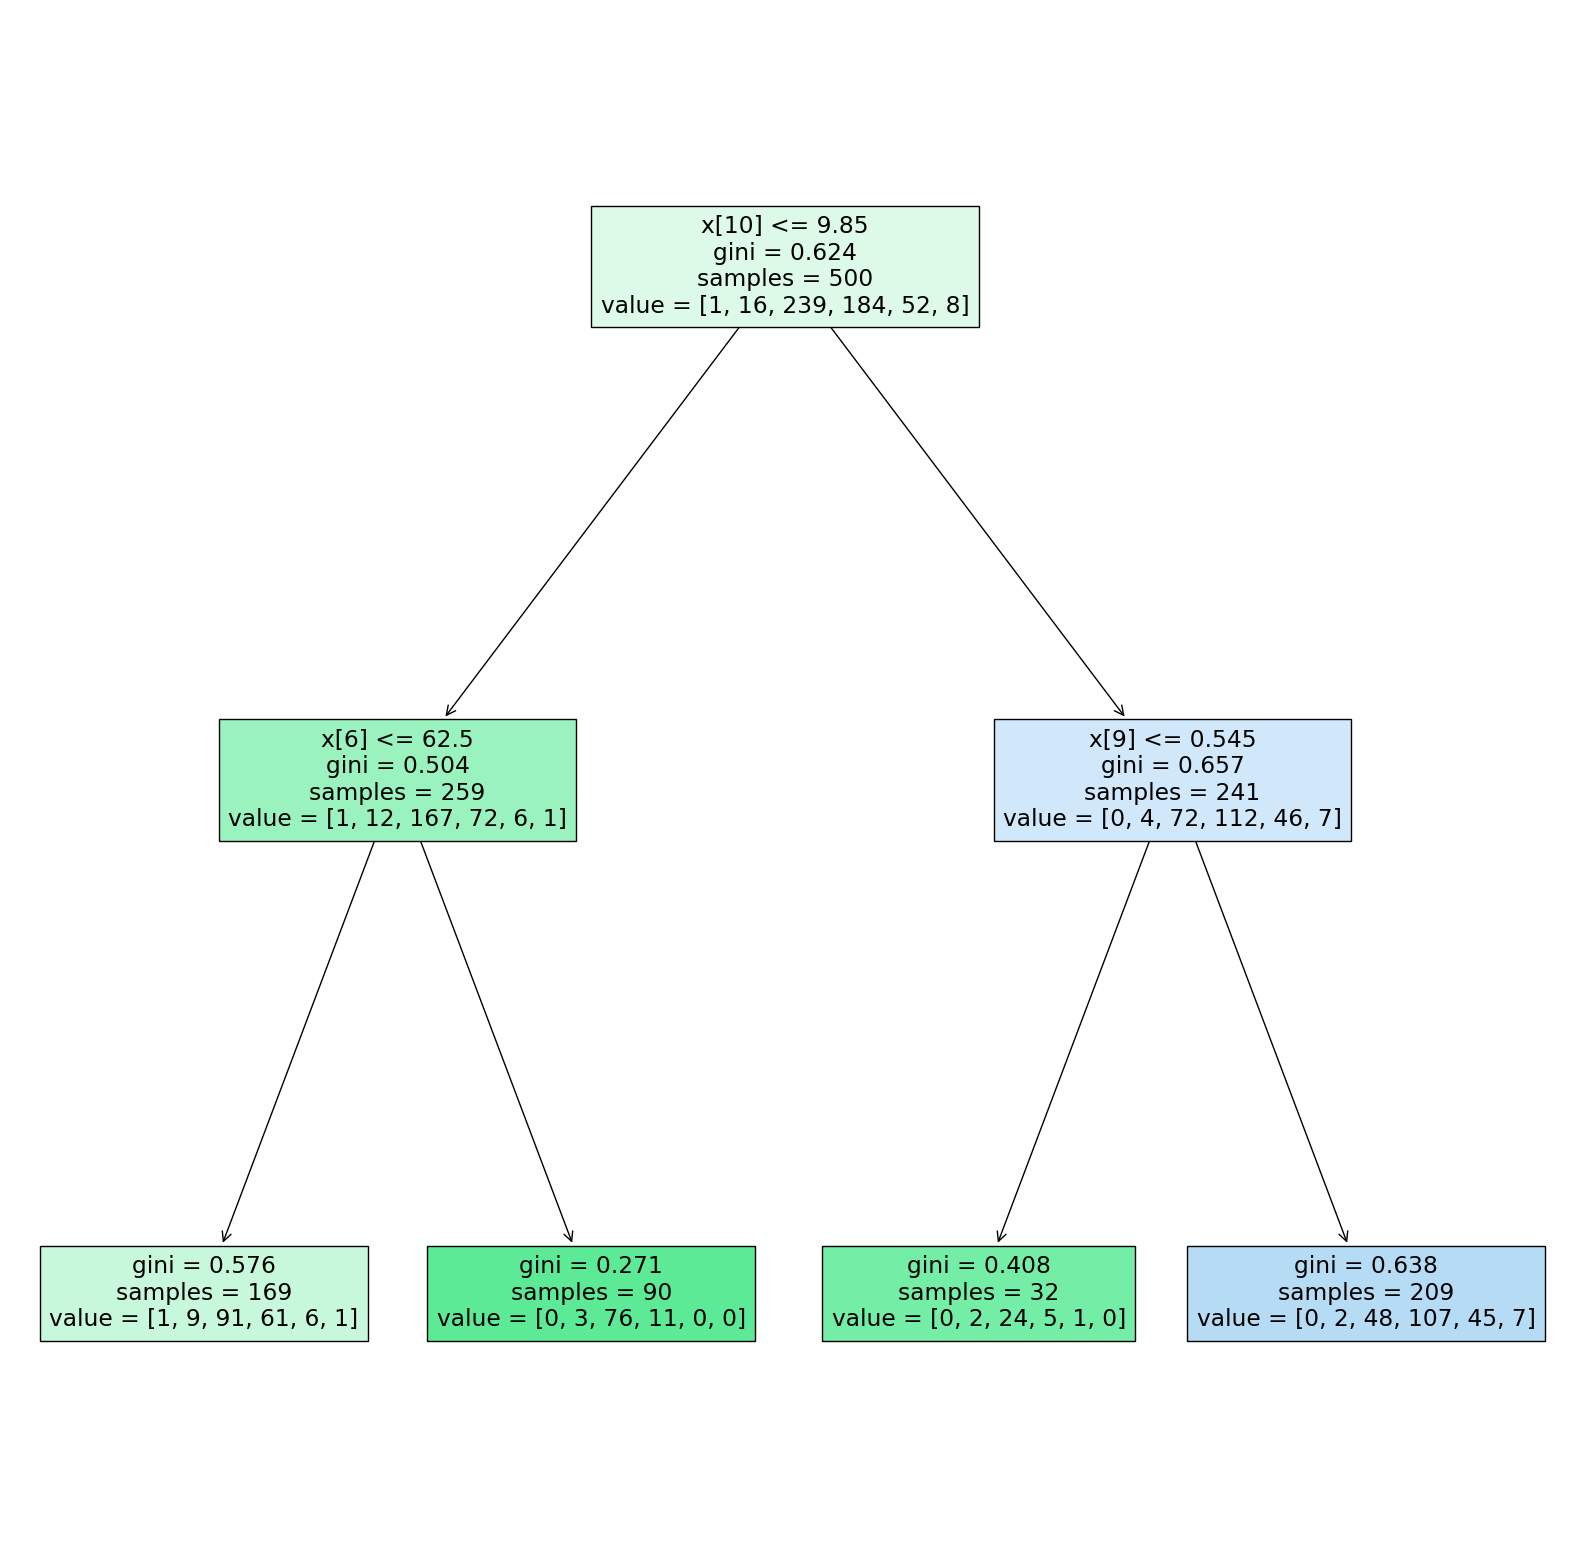

In [55]:
plt.figure(figsize=(20,20))
tree.plot_tree(dt_model_ccp,filled = True)

### we can see clearly that this tree is less complex

In [56]:
dt_model_ccp.score(x1,y1)

0.596

In [57]:
dt_model_ccp.score(x_test,y_test)

0.5775

### no this score closer to each other

### Now we will try using Grid Search so that we can find best hyperparameters to find the best configuration for our model

In [58]:
DecisionTreeClassifier()

DecisionTreeClassifier()

In [59]:
grid_pram = {'criterion':['gini','entropy'],
'splitter':['best','random'],
'max_depth':range(2,40,1),
'min_samples_split':(2,10,1),
'min_samples_leaf':range(1,10,1)}

In [60]:
grid_ccp = GridSearchCV(estimator = dt_model_ccp, param_grid= grid_pram, cv = 5,n_jobs=-1)

In [61]:
grid_ccp.fit(x1,y1)

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
6840 fits failed out of a total of 20520.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
6840 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\HP\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(ccp_alpha=0.014, random_state=0),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 40),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': (2, 10, 1),
                         'splitter': ['best', 'random']})

In [62]:
grid_ccp.best_params_

{'criterion': 'entropy',
 'max_depth': 15,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'splitter': 'random'}

### these are the best parameters we should use

In [63]:
dt_cpp_new= DecisionTreeClassifier(criterion= 'entropy',
max_depth= 15,
min_samples_leaf= 2,
min_samples_split= 2,
splitter= 'random')

In [64]:
dt_cpp_new.fit(x1,y1)

DecisionTreeClassifier(criterion='entropy', max_depth=15, min_samples_leaf=2,
                       splitter='random')

In [65]:
dt_cpp_new.score(x1,y1)

0.872

In [66]:
dt_cpp_new.score(x_test,y_test)

0.595

In [72]:
x_train.head(1)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1178            5.6             0.915          0.0             2.1      0.041   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
1178                 17.0                  78.0  0.99346  3.68       0.73   

      alcohol  
1178     11.4

In [73]:
y_train

1178    5
1189    4
161     4
109     5
961     5
       ..
919     6
1164    5
500     6
941     7
421     7
Name: quality, Length: 1199, dtype: int64

# So this model is also overfiting so grid search not always ensures that our model is will be fitted perfectly

In [76]:
pred = dt_cpp_new.predict(x_train)


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [77]:
ss = dt_cpp_new.predict([[5.6,0.915,0.0,2.1,0.041,17.0,78.0,0.99346,3.68,0.73,11.4]])
ss

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([5], dtype=int64)

### as you can see its predicting correctly

# Now Lets make a random forest predictive system

In [79]:
data

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
0         9.4        5  
1         9.8        5  
2         9.8        5  
3         9.8        6  
4         9.4        5  
...       ...      ...  
1594     10.5        5  
1595     11.2        6  
1596     11.0        6  
1597     10.2        5  
1598     11.0        6  

[1599 rows x 12 columns]

In [80]:
x = data.drop(columns=['quality'])

In [82]:
y = data.quality

In [83]:
from sklearn.ensemble import BaggingClassifier

In [84]:
x_train, x_test, y_train,y_test = train_test_split(x,y,random_state=0)

In [85]:
bag_dt = BaggingClassifier(DecisionTreeClassifier(), n_estimators = 10)

In [86]:
bag_dt.fit(x_train,y_train)

BaggingClassifier(estimator=DecisionTreeClassifier())

In [87]:
bag_dt.predict(x_test)

array([6, 6, 7, 5, 5, 6, 5, 6, 5, 5, 5, 5, 6, 6, 5, 7, 7, 5, 6, 6, 6, 6,
       6, 6, 5, 5, 5, 7, 5, 6, 5, 5, 5, 5, 7, 7, 6, 5, 6, 5, 5, 7, 6, 7,
       6, 5, 5, 6, 5, 6, 5, 5, 6, 6, 6, 5, 5, 5, 7, 5, 5, 6, 6, 6, 5, 6,
       5, 5, 7, 6, 6, 5, 5, 5, 6, 6, 5, 5, 5, 6, 6, 5, 5, 6, 6, 6, 6, 5,
       5, 5, 5, 6, 6, 5, 5, 6, 6, 5, 5, 6, 7, 6, 6, 6, 5, 5, 5, 5, 6, 5,
       6, 5, 7, 5, 6, 6, 6, 6, 6, 6, 5, 5, 3, 5, 6, 6, 5, 5, 6, 6, 5, 6,
       6, 5, 6, 5, 6, 5, 6, 5, 6, 5, 5, 5, 6, 6, 7, 7, 5, 5, 6, 6, 5, 5,
       5, 6, 6, 5, 7, 6, 5, 6, 7, 5, 5, 5, 6, 6, 6, 6, 6, 6, 5, 7, 5, 6,
       5, 7, 7, 5, 5, 6, 6, 6, 6, 5, 5, 6, 5, 6, 6, 5, 6, 6, 5, 5, 5, 6,
       6, 5, 5, 6, 6, 6, 5, 5, 5, 6, 6, 6, 5, 6, 5, 6, 5, 6, 5, 6, 6, 5,
       5, 5, 6, 5, 6, 6, 6, 6, 6, 5, 5, 6, 6, 5, 7, 6, 6, 7, 7, 6, 5, 5,
       5, 5, 6, 5, 5, 5, 5, 7, 5, 5, 5, 6, 5, 6, 5, 5, 5, 7, 5, 6, 5, 6,
       5, 5, 5, 5, 5, 5, 6, 5, 6, 5, 6, 6, 6, 6, 6, 7, 5, 7, 5, 6, 6, 5,
       5, 5, 7, 6, 5, 5, 6, 6, 6, 6, 6, 6, 5, 5, 6,

In [88]:
from sklearn.neighbors import KNeighborsClassifier

In [89]:
bag_knn = BaggingClassifier(KNeighborsClassifier(6), n_estimators=10)

In [90]:
bag_knn.fit(x_train,y_train)

BaggingClassifier(estimator=KNeighborsClassifier(n_neighbors=6))

In [91]:
bag_knn.predict(x_test)

array([5, 6, 7, 6, 6, 5, 6, 6, 6, 6, 5, 6, 5, 5, 6, 5, 7, 6, 7, 6, 6, 6,
       6, 5, 6, 5, 6, 6, 5, 6, 6, 6, 6, 6, 6, 6, 5, 6, 6, 6, 6, 7, 6, 5,
       6, 6, 5, 6, 5, 6, 6, 5, 6, 7, 5, 5, 5, 5, 7, 5, 5, 6, 6, 5, 5, 5,
       5, 7, 8, 7, 5, 5, 6, 5, 6, 6, 5, 6, 5, 6, 5, 5, 4, 6, 6, 5, 5, 5,
       6, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 5, 5, 5, 5, 6, 6, 6, 6, 7, 6, 5,
       6, 5, 6, 6, 5, 6, 5, 7, 7, 6, 5, 7, 6, 5, 7, 5, 5, 5, 5, 7, 5, 5,
       5, 5, 6, 5, 6, 5, 6, 5, 7, 6, 5, 5, 5, 6, 6, 7, 6, 6, 6, 5, 7, 6,
       6, 6, 5, 6, 6, 6, 5, 6, 5, 6, 5, 5, 6, 5, 6, 5, 5, 7, 6, 7, 5, 5,
       7, 7, 7, 5, 5, 6, 6, 7, 7, 5, 6, 5, 5, 6, 5, 5, 5, 6, 5, 5, 5, 5,
       5, 5, 6, 6, 6, 6, 5, 5, 6, 6, 6, 6, 6, 5, 5, 5, 5, 5, 5, 6, 5, 5,
       5, 5, 7, 6, 5, 5, 5, 5, 5, 5, 5, 6, 5, 5, 7, 6, 7, 6, 7, 6, 6, 5,
       6, 6, 5, 5, 5, 5, 5, 5, 5, 6, 5, 6, 5, 5, 5, 6, 5, 6, 5, 6, 6, 5,
       5, 5, 6, 5, 6, 5, 5, 5, 6, 5, 6, 6, 7, 6, 6, 7, 6, 6, 5, 5, 5, 5,
       5, 5, 6, 6, 5, 5, 5, 6, 5, 6, 5, 5, 5, 5, 7,

In [92]:
from sklearn.ensemble import RandomForestClassifier

In [98]:
rf = RandomForestClassifier(n_estimators = 5)

In [99]:
rf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=5)

In [100]:
rf.score(x_test,y_test)

0.63

In [101]:
bag_dt.score(x_test,y_test)

0.655

In [102]:
bag_knn.score(x_test,y_test)

0.4825

In [103]:
rf.estimators_

[DecisionTreeClassifier(max_features='sqrt', random_state=1955759466),
 DecisionTreeClassifier(max_features='sqrt', random_state=2003711104),
 DecisionTreeClassifier(max_features='sqrt', random_state=1597801035),
 DecisionTreeClassifier(max_features='sqrt', random_state=1369978357),
 DecisionTreeClassifier(max_features='sqrt', random_state=480722959)]

In [104]:
rf.estimators_[0]

DecisionTreeClassifier(max_features='sqrt', random_state=1955759466)

[Text(0.5587377187912814, 0.975, 'x[10] <= 10.25\ngini = 0.645\nsamples = 753\nvalue = [7.0, 42.0, 520.0, 463.0, 151.0, 16.0]'),
 Text(0.30872069022457066, 0.925, 'x[5] <= 19.5\ngini = 0.51\nsamples = 409\nvalue = [3.0, 22.0, 421.0, 216.0, 14.0, 1.0]'),
 Text(0.19102130118890356, 0.875, 'x[7] <= 0.997\ngini = 0.55\nsamples = 271\nvalue = [3.0, 17.0, 250.0, 163.0, 12.0, 1.0]'),
 Text(0.0895723249669749, 0.825, 'x[10] <= 9.15\ngini = 0.485\nsamples = 128\nvalue = [2, 11, 143, 48, 6, 1]'),
 Text(0.030779392338177013, 0.775, 'x[9] <= 0.565\ngini = 0.357\nsamples = 9\nvalue = [0, 2, 1, 11, 0, 0]'),
 Text(0.02655217965653897, 0.725, 'x[0] <= 7.7\ngini = 0.625\nsamples = 4\nvalue = [0, 2, 1, 1, 0, 0]'),
 Text(0.022324966974900926, 0.675, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0, 0, 0, 0]'),
 Text(0.030779392338177013, 0.675, 'x[1] <= 0.782\ngini = 0.5\nsamples = 2\nvalue = [0, 0, 1, 1, 0, 0]'),
 Text(0.02655217965653897, 0.625, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1, 0, 0, 0]'),
 Text(0

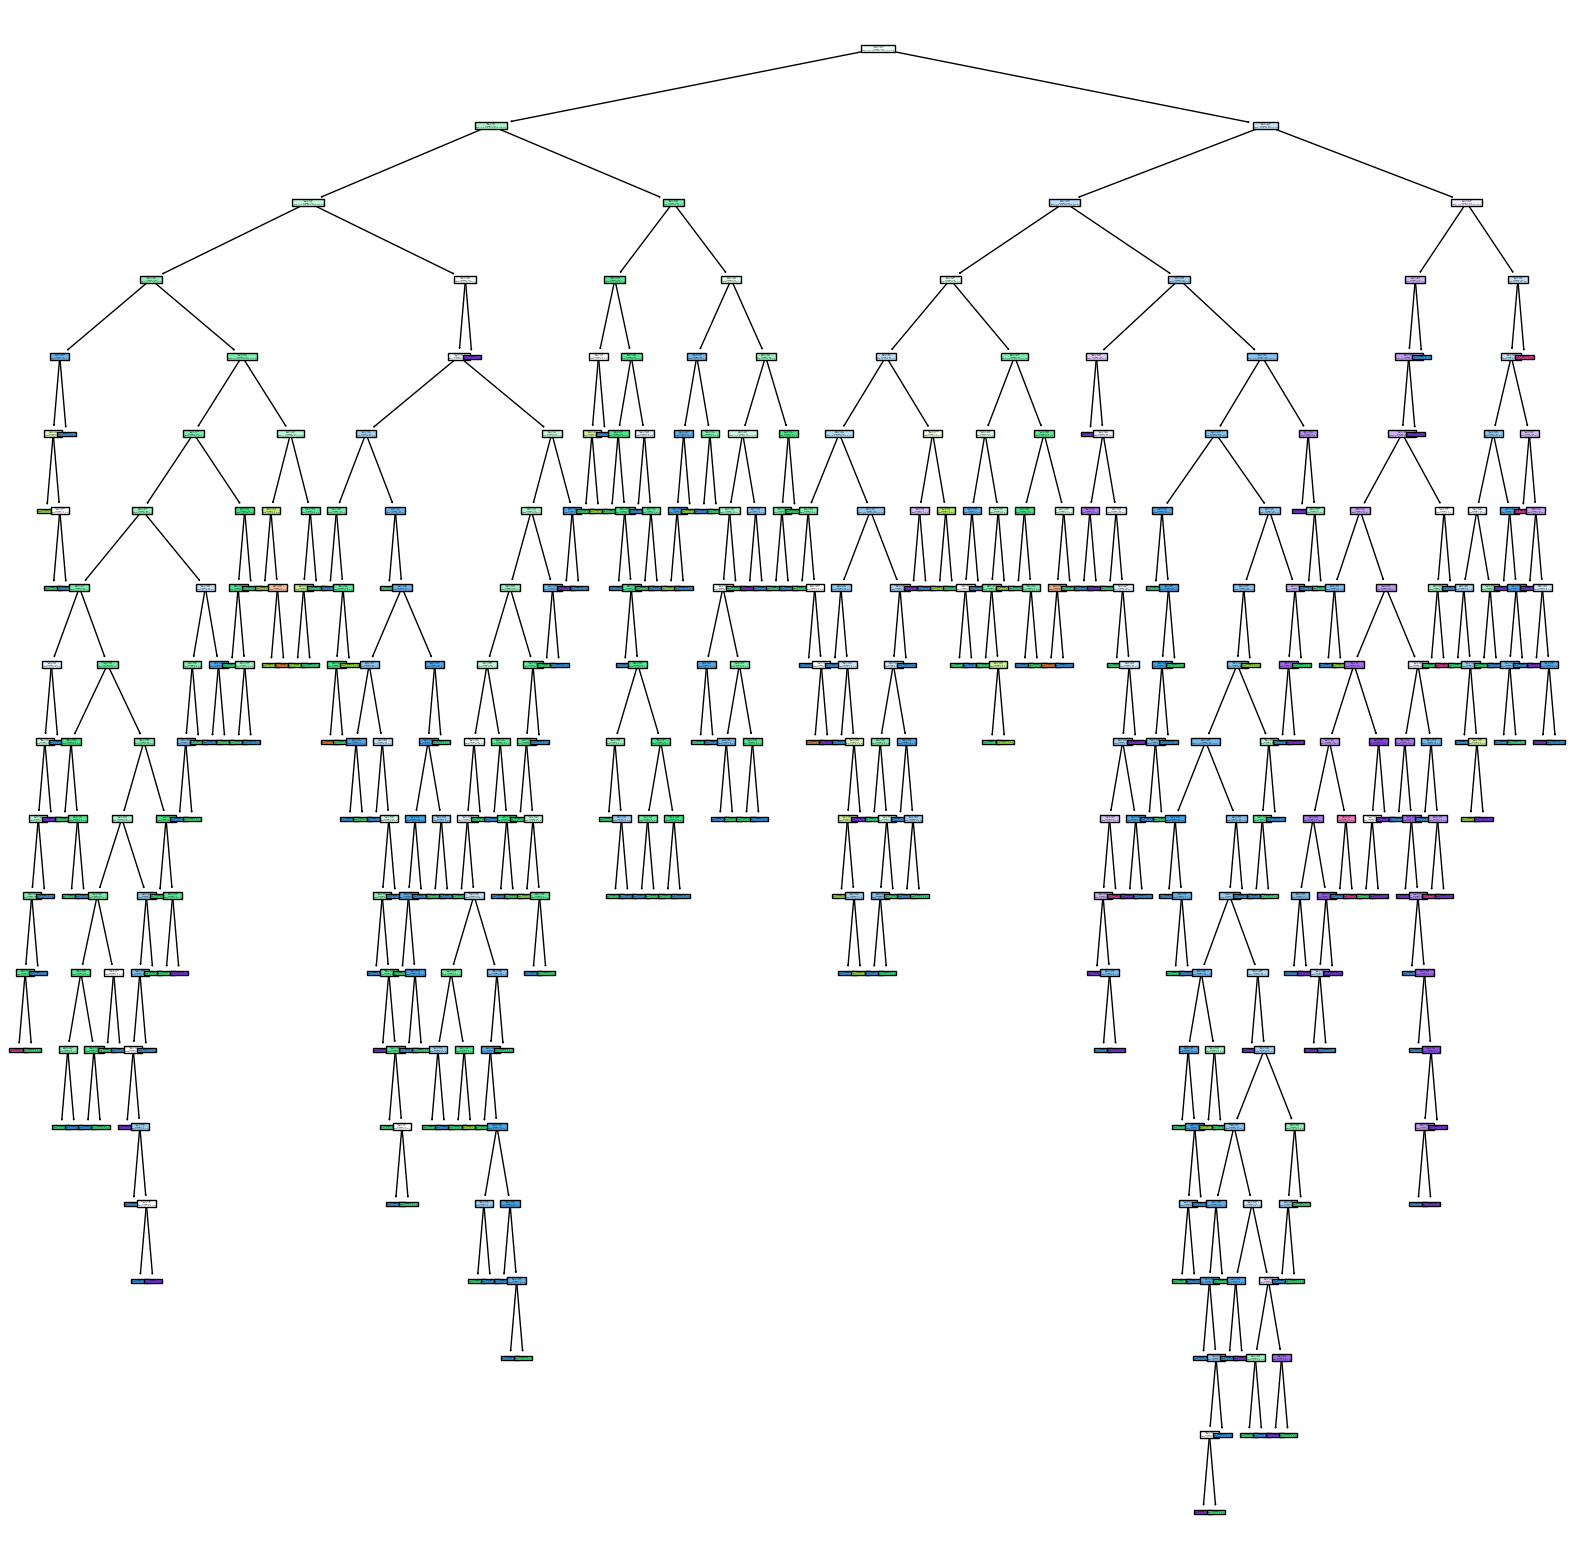

In [105]:
plt.figure(figsize=(20,20))
tree.plot_tree(rf.estimators_[0], filled=True)

[Text(0.42767883111427096, 0.9761904761904762, 'x[4] <= 0.073\ngini = 0.639\nsamples = 764\nvalue = [6, 35, 511, 485, 147, 15]'),
 Text(0.19894002068252326, 0.9285714285714286, 'x[1] <= 0.375\ngini = 0.664\nsamples = 254\nvalue = [1, 16, 105, 187, 74, 10]'),
 Text(0.08738366080661841, 0.8809523809523809, 'x[3] <= 2.025\ngini = 0.601\nsamples = 71\nvalue = [0, 0, 10, 51, 46, 3]'),
 Text(0.05170630816959669, 0.8333333333333334, 'x[7] <= 0.997\ngini = 0.541\nsamples = 39\nvalue = [0, 0, 7, 37, 17, 0]'),
 Text(0.047569803516028956, 0.7857142857142857, 'x[0] <= 8.3\ngini = 0.585\nsamples = 33\nvalue = [0, 0, 7, 28, 17, 0]'),
 Text(0.020682523267838676, 0.7380952380952381, 'x[1] <= 0.308\ngini = 0.54\nsamples = 13\nvalue = [0, 0, 6, 12, 2, 0]'),
 Text(0.012409513960703205, 0.6904761904761905, 'x[0] <= 7.15\ngini = 0.165\nsamples = 8\nvalue = [0, 0, 1, 10, 0, 0]'),
 Text(0.008273009307135471, 0.6428571428571429, 'x[6] <= 43.5\ngini = 0.5\nsamples = 2\nvalue = [0, 0, 1, 1, 0, 0]'),
 Text(0.004

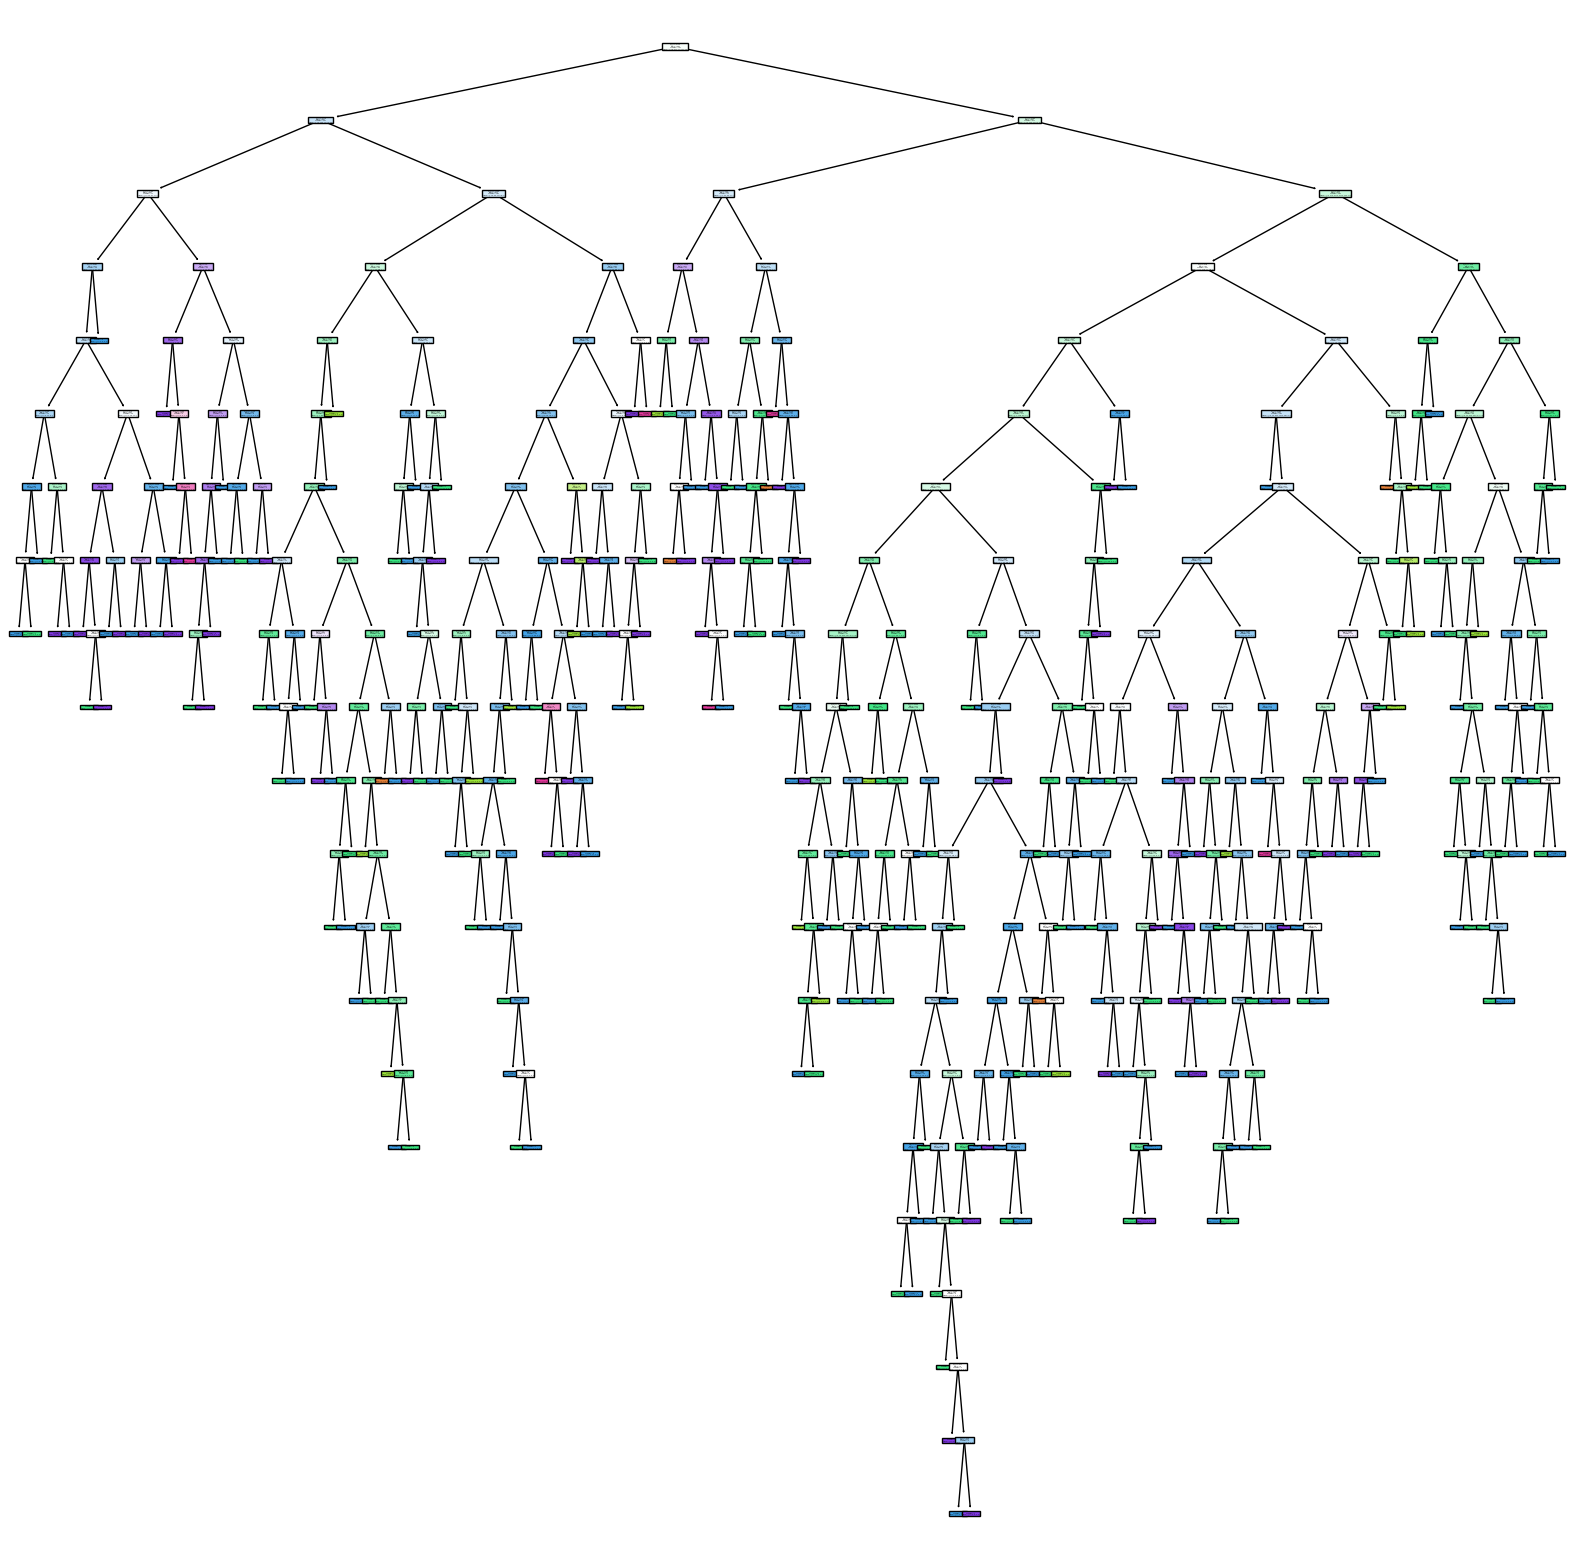

In [106]:
plt.figure(figsize=(20,20))
tree.plot_tree(rf.estimators_[1], filled=True)

### As we can see that both descision tree's shape is different so this means that both of them are using different subsets of data with replacement

In [129]:
grid_pram={
    'n_estimators':[5,10,50,100,120,150],
    'criterion':['gini','entropy'],
    'max_depth': range(10),
    'min_samples_leaf': range(10)
}



In [130]:
grid_search_rf = GridSearchCV(param_grid = grid_pram, cv=10,n_jobs = 6, verbose = 1,estimator=rf)

In [131]:
grid_search_rf.fit(x_train,y_train)

Fitting 10 folds for each of 1200 candidates, totalling 12000 fits


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
2280 fits failed out of a total of 12000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1200 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\HP\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_param

GridSearchCV(cv=10, estimator=RandomForestClassifier(n_estimators=5), n_jobs=6,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(0, 10),
                         'min_samples_leaf': range(0, 10),
                         'n_estimators': [5, 10, 50, 100, 120, 150]},
             verbose=1)

In [132]:
grid_search_rf.best_params_

{'criterion': 'entropy',
 'max_depth': 9,
 'min_samples_leaf': 1,
 'n_estimators': 120}

In [134]:
rf_new = RandomForestClassifier(criterion = 'entropy', max_depth = 9, min_samples_leaf = 1
                    ,  n_estimators = 120)

In [135]:
rf_new.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=9, n_estimators=120)

In [136]:
rf_new.score(x_test,y_test)

0.6725